# Ejercicio Covid-19

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn") 
plt.rcParams["figure.figsize"] = (15, 5)

# Actualizar submodule: git submodule update

In [3]:
# Datos https://github.com/CSSEGISandData/COVID-19.git
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv" )
data.sample(15)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
152,West Virginia,US,38.4912,-80.9545,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67743,67760,67773,67781,67786,67790,67794,67798,67799,67800.0
405,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,0,0,0,0,3,3,3,3,3,3.0
171,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,428,429,435,435,436,437,442,452,456,469.0
42,NaN,San Marino,43.9424,12.4578,0,0,0,0,0,0,...,36,51,62,69,80,80,101,109,109,119.0
444,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,7,12.0
56,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1,1,1,4,8,18,26,52,78,84.0
267,"Manatee County, FL",US,27.4799,-82.3452,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,NaN
194,Macau,China,22.1667,113.5500,1,2,2,2,5,6,...,10,10,10,10,10,10,10,11,12,15.0
401,NaN,Guyana,5.0000,-58.7500,0,0,0,0,0,0,...,0,0,0,1,1,1,4,4,7,7.0


In [15]:
# Países diferentes
data['Country/Region'].nunique()

163

In [4]:
#Saco un dataset con solo los países
data_countries = data.groupby("Country/Region", as_index=False).sum()
#Se ve que están todos y comprobado que suma
data_countries[::]
#Filtrar por los que tienen más datos
data_countries = data_countries[data_countries["3/17/20"] >= 1000 ]
data_countries.shape

(16, 60)

In [6]:
#Hago transposición de los datos
data_trans = data_countries.set_index('Country/Region').transpose()
#Me quedo sólo con los datos temporables
data_time = data_trans[2:]
data_time.head()

Country/Region,Austria,Belgium,China,Denmark,France,Germany,Iran,Italy,"Korea, South",Netherlands,Norway,Spain,Sweden,Switzerland,US,United Kingdom
1/22/20,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1/23/20,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1/24/20,0.0,0.0,920.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1/25/20,0.0,0.0,1406.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1/26/20,0.0,0.0,2075.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [8]:
from datetime import date
data_time.index = pd.to_datetime(data_time.index)
data_time.head()

Country/Region,Austria,Belgium,China,Denmark,France,Germany,Iran,Italy,"Korea, South",Netherlands,Norway,Spain,Sweden,Switzerland,US,United Kingdom
2020-01-22,0.0,0.0,548.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-23,0.0,0.0,643.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-01-24,0.0,0.0,920.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-25,0.0,0.0,1406.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2020-01-26,0.0,0.0,2075.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [9]:
# Exportar CSV
data_time.to_csv(r'covid19-csv.csv', index = True)

In [28]:
# Filtrar sin China y último mes
data_time_filter = data_time[-30:]
data_time_filter = data_time_filter.drop('China', axis=1)
data_time_filter.head(30)

Country/Region,Austria,Belgium,Denmark,France,Germany,Iran,Italy,"Korea, South",Netherlands,Norway,Spain,Sweden,Switzerland,US,United Kingdom
2020-02-18,0.0,1.0,0.0,12.0,16.0,0.0,3.0,31.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
2020-02-19,0.0,1.0,0.0,12.0,16.0,2.0,3.0,31.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
2020-02-20,0.0,1.0,0.0,12.0,16.0,5.0,3.0,104.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
2020-02-21,0.0,1.0,0.0,12.0,16.0,18.0,20.0,204.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
2020-02-22,0.0,1.0,0.0,12.0,16.0,28.0,62.0,433.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
2020-02-23,0.0,1.0,0.0,12.0,16.0,43.0,155.0,602.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
2020-02-24,0.0,1.0,0.0,12.0,16.0,61.0,229.0,833.0,0.0,0.0,2.0,1.0,0.0,51.0,13.0
2020-02-25,2.0,1.0,0.0,14.0,17.0,95.0,322.0,977.0,0.0,0.0,6.0,1.0,1.0,51.0,13.0
2020-02-26,2.0,1.0,0.0,18.0,27.0,139.0,453.0,1261.0,0.0,1.0,13.0,2.0,1.0,57.0,13.0
2020-02-27,3.0,1.0,1.0,38.0,46.0,245.0,655.0,1766.0,1.0,1.0,15.0,7.0,8.0,58.0,15.0


In [17]:
list_countries = data_time_filter.columns
list_countries

Index(['Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Iran', 'Italy',
       'Korea, South', 'Netherlands', 'Norway', 'Spain', 'Sweden',
       'Switzerland', 'US', 'United Kingdom'],
      dtype='object', name='Country/Region')

### Exportar CSV independientes para cada país

In [106]:
for country in list_countries:
    dataX = data_time_filter[country]
    dataX = dataX[dataX > 100]
    dataX.to_csv('data_' + country + ".csv", index=False, header= country)


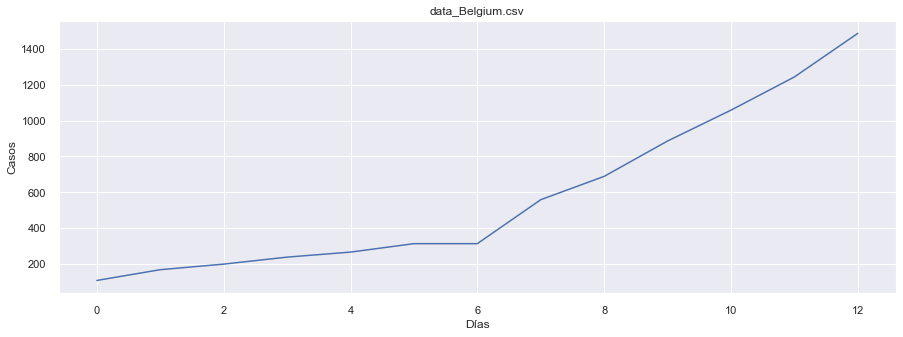

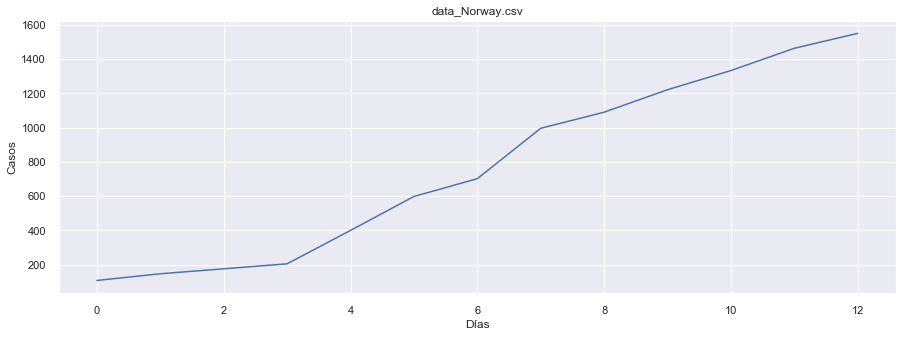

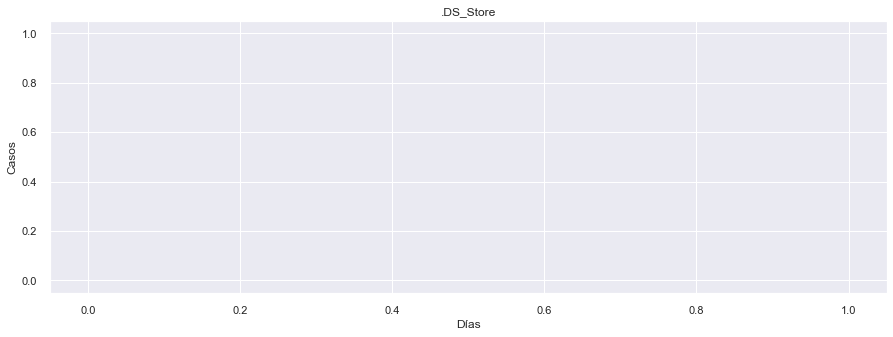

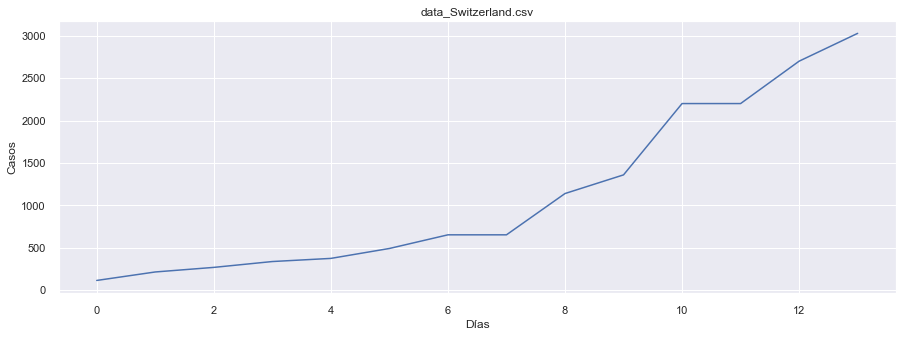

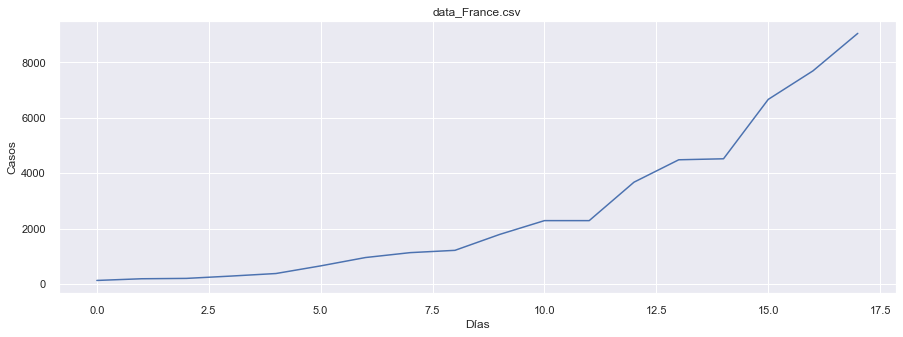

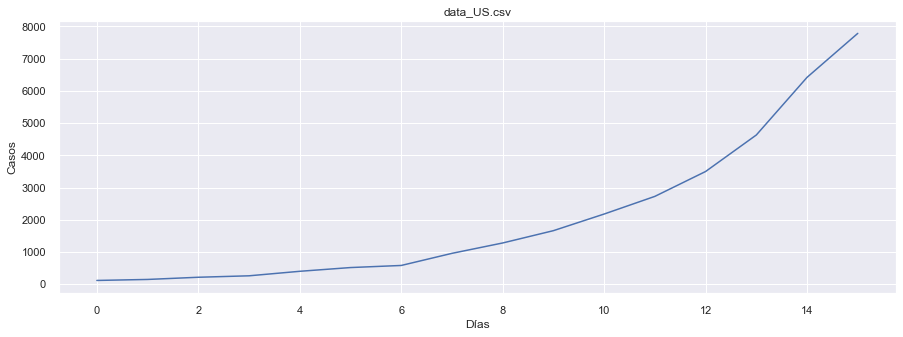

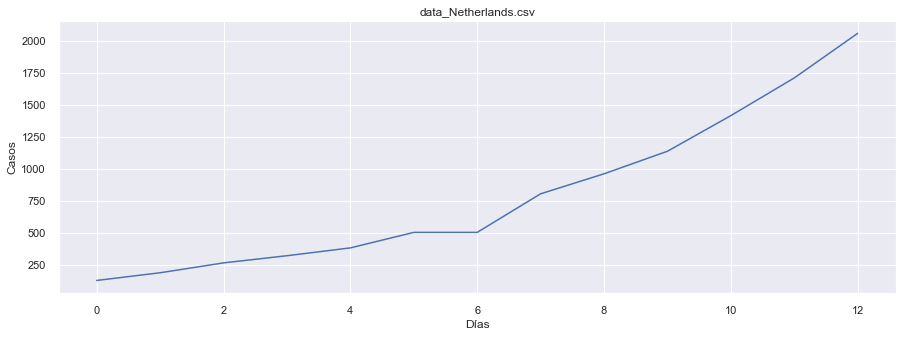

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [107]:
# Funciona a cachos
import os
directory = '/Users/victormac/PROYECTOS/REPOS/REPOS-Github/Ejercicios-casuales/covid19-exercise'
for filename in os.listdir(directory):
    if filename.endswith("*.csv"):
        dataframe2 = pd.read_csv(filename)
        continue
    dataframe2 = pd.read_csv(filename)
    plt.plot(dataframe2)
    plt.title(filename)
    plt.xlabel("Días")
    plt.ylabel("Casos")
    plt.show()


In [108]:
dataframe2

,Netherlands
0,128.0
1,188.0
2,265.0
3,321.0
4,382.0
5,503.0
6,503.0
7,804.0
8,960.0
9,1136.0


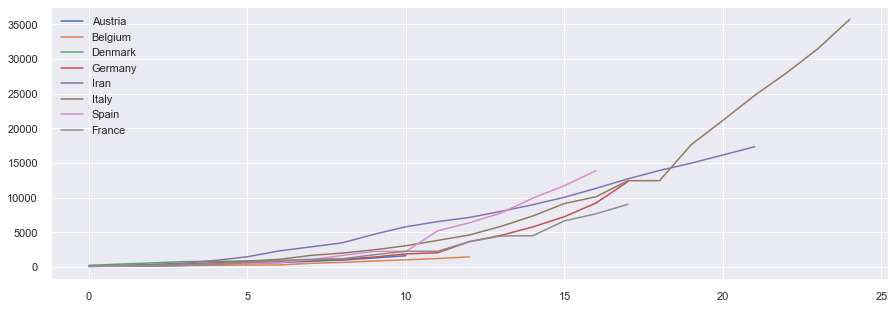

In [109]:
dataframe_Austria = pd.read_csv('data_Austria.csv')
dataframe_Belgium = pd.read_csv('data_Belgium.csv')
dataframe_Denmark = pd.read_csv('data_Denmark.csv')
dataframe_Germany = pd.read_csv('data_Germany.csv')
dataframe_Iran = pd.read_csv('data_Iran.csv')
dataframe_France = pd.read_csv('data_France.csv')
dataframe_Italy = pd.read_csv('data_Italy.csv')
dataframe_Spain = pd.read_csv('data_Spain.csv')
plt.plot(dataframe_Austria, label='Austria')
plt.plot(dataframe_Belgium, label='Belgium')
plt.plot(dataframe_Denmark,label='Denmark')
plt.plot(dataframe_Germany, label='Germany')
plt.plot(dataframe_Iran, label='Iran')
plt.plot(dataframe_Italy, label='Italy')
plt.plot(dataframe_Spain, label='Spain')
plt.plot(dataframe_France, label='France')
plt.legend()
plt.show()

In [30]:
from glob import glob
filenames = glob('*.csv')
dataframes = [pd.read_csv(f) for f in filenames]
dataframes

[     109.0
 0    169.0
 1    200.0
 2    239.0
 3    267.0
 4    314.0
 5    314.0
 6    559.0
 7    689.0
 8    886.0
 9   1058.0
 10  1243.0
 11  1486.0,       56.0
 0     87.0
 1    108.0
 2    147.0
 3    176.0
 4    205.0
 5    400.0
 6    598.0
 7    702.0
 8    996.0
 9   1090.0
 10  1221.0
 11  1333.0
 12  1463.0
 13  1550.0,       56.0
 0     90.0
 1    114.0
 2    214.0
 3    268.0
 4    337.0
 5    374.0
 6    491.0
 7    652.0
 8    652.0
 9   1139.0
 10  1359.0
 11  2200.0
 12  2200.0
 13  2700.0
 14  3028.0,       57.0
 0    100.0
 1    130.0
 2    191.0
 3    204.0
 4    288.0
 5    380.0
 6    656.0
 7    957.0
 8   1134.0
 9   1217.0
 10  1792.0
 11  2290.0
 12  2290.0
 13  3678.0
 14  4487.0
 15  4523.0
 16  6668.0
 17  7699.0
 18  9052.0,       51.0
 0     51.0
 1     57.0
 2     58.0
 3     60.0
 4     68.0
 5     74.0
 6     98.0
 7    118.0
 8    149.0
 9    217.0
 10   262.0
 11   402.0
 12   518.0
 13   583.0
 14   959.0
 15  1281.0
 16  1663.0
 17  2179.0
 18 

In [19]:
# Quitar fechas de index, y ponerlo con número
data_time_filter = data_time_filter.reset_index(drop=True)
data_time_filter

Country/Region,Austria,Belgium,Denmark,France,Germany,Iran,Italy,"Korea, South",Netherlands,Norway,Spain,Sweden,Switzerland,US,United Kingdom
0,0.0,1.0,0.0,12.0,16.0,0.0,3.0,31.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
1,0.0,1.0,0.0,12.0,16.0,2.0,3.0,31.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
2,0.0,1.0,0.0,12.0,16.0,5.0,3.0,104.0,0.0,0.0,2.0,1.0,0.0,13.0,9.0
3,0.0,1.0,0.0,12.0,16.0,18.0,20.0,204.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
4,0.0,1.0,0.0,12.0,16.0,28.0,62.0,433.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
5,0.0,1.0,0.0,12.0,16.0,43.0,155.0,602.0,0.0,0.0,2.0,1.0,0.0,15.0,9.0
6,0.0,1.0,0.0,12.0,16.0,61.0,229.0,833.0,0.0,0.0,2.0,1.0,0.0,51.0,13.0
7,2.0,1.0,0.0,14.0,17.0,95.0,322.0,977.0,0.0,0.0,6.0,1.0,1.0,51.0,13.0
8,2.0,1.0,0.0,18.0,27.0,139.0,453.0,1261.0,0.0,1.0,13.0,2.0,1.0,57.0,13.0
9,3.0,1.0,1.0,38.0,46.0,245.0,655.0,1766.0,1.0,1.0,15.0,7.0,8.0,58.0,15.0


In [44]:
# Otra forma creando un dataframe único con todos los datos, pero no funciona porque se queda con el más corto
data_new = pd.DataFrame()
for country in list_countries:
    dataX = data_time_filter[country]
    dataX = dataX[dataX > 100]
    data_new.insert(0, country, dataX, True)
print(data_new.shape)
data_new


(11, 15)


,United Kingdom,US,Switzerland,Sweden,Spain,Norway,Netherlands,"Korea, South",Italy,Iran,Germany,France,Denmark,Belgium,Austria
2020-03-08,274.0,518.0,337.0,203.0,673.0,176.0,265.0,7314.0,7375.0,6566.0,1040.0,1134.0,NaN,200.0,104.0
2020-03-09,322.0,583.0,374.0,248.0,1073.0,205.0,321.0,7478.0,9172.0,7161.0,1176.0,1217.0,NaN,239.0,131.0
2020-03-10,384.0,959.0,491.0,355.0,1695.0,400.0,382.0,7513.0,10149.0,8042.0,1457.0,1792.0,264.0,267.0,182.0
2020-03-11,459.0,1281.0,652.0,500.0,2277.0,598.0,503.0,7755.0,12462.0,9000.0,1908.0,2290.0,444.0,314.0,246.0
2020-03-12,459.0,1663.0,652.0,599.0,2277.0,702.0,503.0,7869.0,12462.0,10075.0,2078.0,2290.0,617.0,314.0,302.0
2020-03-13,802.0,2179.0,1139.0,814.0,5232.0,996.0,804.0,7979.0,17660.0,11364.0,3675.0,3678.0,804.0,559.0,504.0
2020-03-14,1144.0,2727.0,1359.0,961.0,6391.0,1090.0,960.0,8086.0,21157.0,12729.0,4585.0,4487.0,836.0,689.0,655.0
2020-03-15,1145.0,3499.0,2200.0,1022.0,7798.0,1221.0,1136.0,8162.0,24747.0,13938.0,5795.0,4523.0,875.0,886.0,860.0
2020-03-16,1551.0,4632.0,2200.0,1103.0,9942.0,1333.0,1414.0,8236.0,27980.0,14991.0,7272.0,6668.0,932.0,1058.0,1018.0
2020-03-17,1960.0,6421.0,2700.0,1190.0,11748.0,1463.0,1708.0,8320.0,31506.0,16169.0,9257.0,7699.0,1024.0,1243.0,1332.0


In [364]:
pd.isnull(data_time_most).any().count()

152

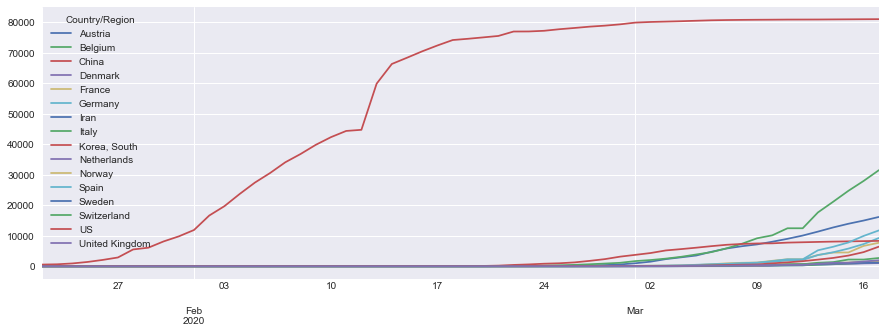

In [365]:
data_time.plot()
plt.show()

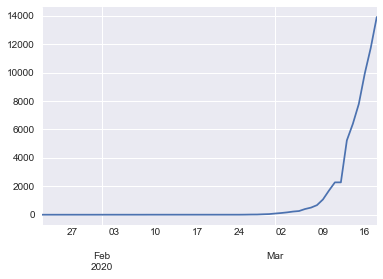

In [16]:
data_time_spain = data_time['Spain']
data_time_spain.shape
data_time_spain.plot()
plt.show()

## Modelado de AR

In [367]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data_time_spain, order = (2, 0, 0)).fit() 

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [368]:
prediction = model.get_forecast(steps = 12)

In [369]:
prediction.conf_int().head()

,lower Spain,upper Spain
2020-03-18,12042.527967,13854.387740
2020-03-19,11934.537739,15500.931338
2020-03-20,11524.015048,16836.909587
2020-03-21,10936.958034,17914.478768
2020-03-22,10251.730359,18782.587668


In [370]:
prediction.predicted_mean.head()

2020-03-18    12948.457854
2020-03-19    13717.734538
2020-03-20    14180.462318
2020-03-21    14425.718401
2020-03-22    14517.159014
Freq: D, dtype: float64

In [371]:
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

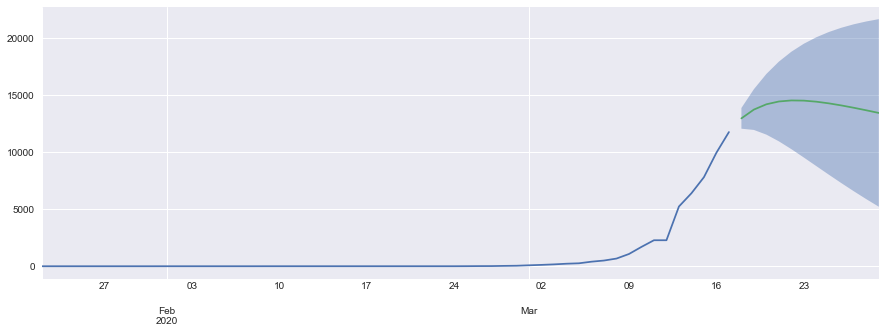

In [372]:
fig, ax = plt.subplots()
data_time_spain.plot(ax = ax)
prediction.predicted_mean.plot(ax = ax)
ax.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [373]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_time.Spain)

(3.410951690700507,
 1.0,
 11,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 507.2925170512722)

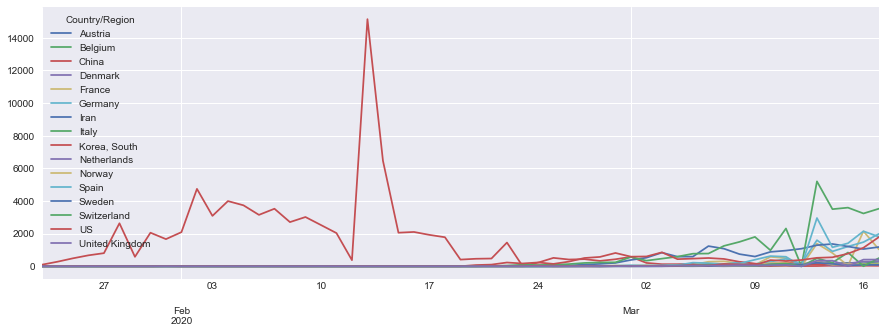

In [374]:
data_diff = data_time - data_time.shift(1)
data_diff.dropna(inplace = True)
data_diff.plot();

In [375]:
adfuller(data_diff.Spain)

(4.397045159343214,
 1.0,
 11,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 500.7439543949986)

## Modelo SARIMA

In [376]:
model = SARIMAX(data_time.Spain, order = (3, 1, 2), seasonal_order = (1, 1, 2, 12)).fit()

/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/victormac/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [377]:
prediction = model.get_forecast(steps = 12)
lower = prediction.conf_int()["lower Spain"]
upper = prediction.conf_int()["upper Spain"]

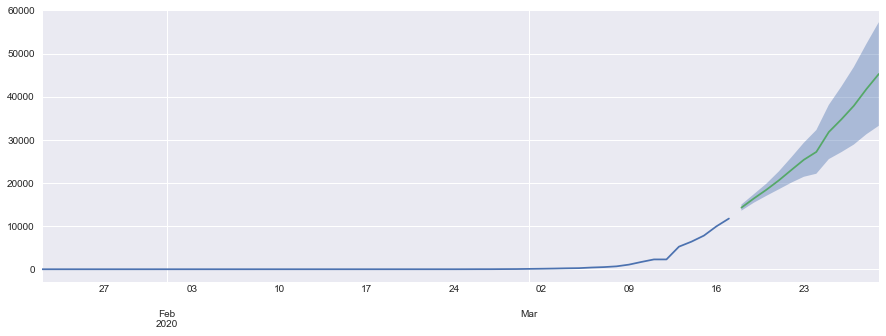

In [378]:
data_time.Spain.plot()
prediction.predicted_mean.plot()
plt.fill_between(lower.index, lower, upper, alpha = 0.4)
plt.show()

In [379]:
model.resid.head()

2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
dtype: float64

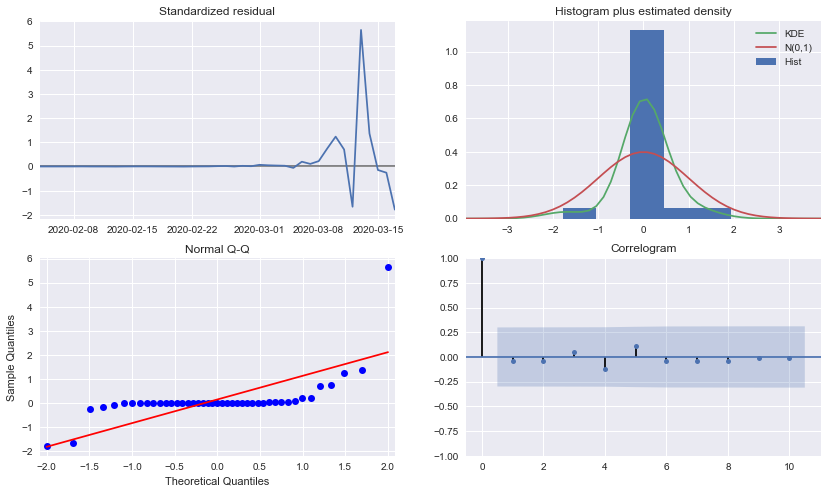

In [380]:
model.plot_diagnostics(figsize = (14, 8))
plt.show()